In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd

In [2]:
def network(CaLM,IGF,TRAIL,EGF,TNFa,IL6,TGFb,IFN,Hh,WNT,cAMP,ROS,fCXCR4,fSLC1A3,fIL8,fMDM2,fp53,fPTEN,fSTAT3,cryp,ly294002,lapatinib,nt157,sh454,temsi,uo126,px478):
    
    CaMK = CaLM
    IGF1R = IGF and (not nt157)
    IRS = IGF1R

    EGFR = EGF and (not lapatinib)
    RAS = EGFR or IRS or CaLM or cAMP
    
    CXCR4 = IGF
    
    if fCXCR4 == 1:
        CXCR4 = 1
    
    RAF = RAS
    MEK1 = RAF and (not uo126)
    
    PI3K = (RAS or IRS or CXCR4) and (not ly294002)
    PIP2 = PI3K
    
    PTEN = 1
    
    if fPTEN == 1:
        PTEN = 0
    
    PIP3 = PIP2 and (not PTEN)
    MTORC2 = PIP3
    PDK1 = PIP3
    AKT = PDK1 or MTORC2
    
    PD1 = ROS
    PLCb1 = ROS or CXCR4
    
    IP3R = (PLCb1 or PIP2) and CaMK
    ERSTRESS = PD1 or IP3R
    
    DAG = PLCb1
    PKC = DAG or IP3R
    
    IRE1a = ERSTRESS
    PERK = ERSTRESS
    ELF2a = PERK
    ATF4 = ELF2a
    
    LPS = IFN
    TLR = LPS
    
    TNFR = TNFa
    
    RIP = TNFR 
    DRP1 = RIP or cryp
    
    NFKB = RIP or ELF2a or TLR
    
    MEKK1 = RAS
    MKK7 = MEKK1 
    
    ASK1 = TNFa or RIP
    JNK = MKK7 or ASK1 or IRE1a or CaMK
    
    NOS = AKT or CaMK
    NO = NOS
    DNAdamage = NO
    
    sGC = NO
    cGMP = sGC
    PKG = cGMP
    
    ERK1 = MEK1 or PKC
    
    RSK = ERK1
    ELK1 = ERK1
    
    MTORC1 = (AKT or PKC or RSK) and (not temsi)
    
    ELF4e = ERK1 or MTORC1
    
    PKA = cAMP and (not Hh)
    
    CREB = (RSK or PKA or CaMK or PKG) and (not ATF4)
    
    IL6R = IL6
    JAK1 = IL6R or PERK or IFN
    
    PTP = 1 or nt157
    
    temp = (not PTP) and (JAK1 or ERK1 or MTORC1)
    
    if fSTAT3 == 1:
        temp = 1
        
    STAT3 = temp and (not (cryp or sh454))
    
    MCL1 = STAT3 and (not DNAdamage)
    
    HIF1a = (STAT3 or NFKB or MTORC1 or ELF4e or ROS) and (not px478)
    VEGF = HIF1a or STAT3
    
    COX2 = NFKB or STAT3
    
    DV1 = WNT
    
    GSK3b = PKA or (not (AKT or DV1))
    GliR = GSK3b and (not Hh)
    GliA = Hh
    
    bCATENIN = cAMP and (not GSK3b)

    SMAD6 = IFN or TNFa    
    SMAD2 = TGFb and (not SMAD6) 
    
    cMYC = (CREB or PKA or PKG or CaMK or bCATENIN) and (not (GSK3b or SMAD2))
    
    cFOS = CREB
    
    RAD3 = DNAdamage
    CHK1 = MCL1 and RAD3
    
    MDM2 = ERK1 or AKT
    
    if fMDM2 == 1 :
        MDM2 = 1
    
    p53 = (CHK1 or JNK) and (not MDM2)
    
    if fp53 == 1 :
        p53 = 0

    p21 = p53 and (not MTORC1)
    CCND1 = (not p21) and (MDM2 or cMYC)

    CDC25 = (not CHK1) or ERK1
    WEE1 = CHK1
    CDC2 = CDC25 and (not WEE1) 
    
    KEAP1 = (not NO)
    NRF2 = (LPS or GSK3b or PERK) and (not KEAP1) 
    
    STING = (cGMP and HIF1a) and (not NRF2) 
    ARE = NRF2
    
    HO1 = NRF2 or HIF1a
    
    SLC1A3 = p53
    
    if fSLC1A3 == 1:
        SLC1A3 = 0
        
    GSH = NFKB and (not p53)
    GSSG = GSH and (SLC1A3 or ARE)
    
    CHOP = (ATF4 or ELK1 or ARE) and (not STAT3)
    
    FAS = p53 or JNK or cFOS

    SRP = TRAIL
    DR4 = SRP and (not COX2)
    DR5 = (TRAIL or JNK or (CHOP and (not COX2))) or (cryp) 
    
    DISC = (DR4 or DR5) or TNFR or FAS
    IL8 = (DISC or NFKB) and (not JNK)
    
    if fIL8 == 1:
        IL8 = 1 
        
    CFLIP = IL8
    CASP8 = np.mean([DISC,(not CFLIP)])
    
    NOXA = p53
    PUMA = p53
    
    BID = np.mean([CASP8, p53])
    BAD = np.mean([(not AKT), JNK])
    BIM = np.mean([JNK, (not MCL1)])
    BCLxL = np.mean([(not BAD), (not BID), (not CHOP),(not NOXA),(not PUMA)])
    BCL2 = np.mean([(PUMA and MCL1), GliA, (not GliR), (not BIM), (not NOXA), (not PUMA)])
    BAKX = np.mean([BID, JNK, (not BCL2), (not BCLxL)])
    
    A1 = NFKB
    survivin = bCATENIN or STAT3
    
    CALPAIN = (IP3R or BAKX) and CaMK
    CASP12 = ERSTRESS or CALPAIN
    
    XBP1 = ERSTRESS
    
    EPO = HIF1a
    
    ROS = np.mean([ROS,TRAIL,TNFa,not(GSH),GSSG,(not HO1),ARE]) 
    MMP = np.mean([BAKX, ROS, (not BCL2), (not BCLxL)]) 
    CYTOc = MMP
    XIAP = np.mean([AKT,(not MMP)])

    pro = np.mean([BAKX, BAD, CASP8, CASP12, BID, BIM, STING, DRP1])
    anti = np.mean([BCL2, BCLxL, MCL1, XIAP, XBP1, survivin, EPO, A1])
    
    apoptosis_ratio = np.true_divide(pro,anti)
    
    return apoptosis_ratio

In [3]:
def boolean_network_function(inputs,drugs,faults):
    
    num_in = 12
    num_drugs = 8
    num_faults = 7

    bin_in = np.binary_repr(inputs, width=num_in)
    
    IGF = int(bin_in[0])
    TRAIL = int(bin_in[1])
    CaLM = int(bin_in[2]) 
    EGF = int(bin_in[3])
    TNFa = int(bin_in[4])
    IL6 = int(bin_in[5])
    TGFb = int(bin_in[6])
    IFN = int(bin_in[7])
    Hh = int(bin_in[8])
    WNT = int(bin_in[9])
    cAMP = int(bin_in[10])
    ROS = int(bin_in[11])
    
    
    bin_fault = np.binary_repr(faults, width=num_faults)
    
    fCXCR4 = int(bin_fault[0]) 
    fSLC1A3 = int(bin_fault[1]) 
    fIL8 = int(bin_fault[2]) 
    fMDM2 = int(bin_fault[3]) 
    fp53 = int(bin_fault[4])
    fPTEN = int(bin_fault[5]) 
    fSTAT3 = int(bin_fault[6])
    
    bin_dr = np.binary_repr(drugs, width=num_drugs)

    cryp = int(bin_dr[0])
    ly294002 = int(bin_dr[1])
    lapatinib = int(bin_dr[2])
    nt157 = int(bin_dr[3])
    sh454 =  int(bin_dr[4])
    temsi = int(bin_dr[5]) 
    uo126 = int(bin_dr[6])
    px478 = int(bin_dr[7])
    
    #print(cryp)
    
    apoptosis_ratio = network(CaLM,IGF,TRAIL,EGF,TNFa,IL6,TGFb,IFN,Hh,WNT,cAMP,ROS,fCXCR4,fSLC1A3,fIL8,fMDM2,fp53,fPTEN,fSTAT3,cryp,ly294002,lapatinib,nt157,sh454,temsi,uo126,px478)

    return apoptosis_ratio

In [4]:
inputs = int('110000000000',2) 
faults = int('1111111',2)

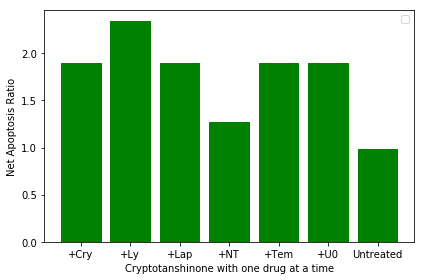

In [5]:
#SINGLE DRUG

drugs = [int('10000000',2),int('11000000',2),int('10100000',2),int('10010000',2),int('10000100',2),int('10000010',2),0] 

apoptotic_fraction = np.zeros(len(drugs))
   
for i in range(0,len(drugs)):
    
    apoptosis_ratio = boolean_network_function(inputs,drugs[i],faults)

    apoptotic_fraction[i] = apoptosis_ratio
    
#apoptotic_fraction = preprocessing.scale(apoptotic_fraction,with_mean=False,copy=False)
    
objects = ('+Cry','+Ly','+Lap','+NT','+Tem','+U0','Untreated')
plt.xlabel('Cryptotanshinone with one drug at a time')
plt.ylabel('Net Apoptosis Ratio')
barlist = plt.bar(objects,apoptotic_fraction)
for i in barlist:
    i.set_color('g')
plt.legend()
plt.tight_layout()
plt.show()

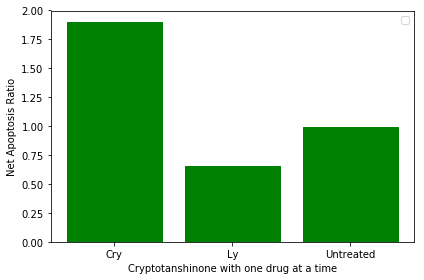

In [6]:
# Cryptotanshinone and Ly294002 comparison

drugs = [int('10000000',2),int('01000000',2),0] 

apoptotic_fraction = np.zeros(len(drugs))
   
for i in range(0,len(drugs)):
    
    apoptosis_ratio = boolean_network_function(inputs,drugs[i],faults)
    
    apoptotic_fraction[i] = apoptosis_ratio

#apoptotic_fraction = preprocessing.scale(apoptotic_fraction,with_mean=False,copy=False)

objects = ('Cry','Ly','Untreated')
plt.xlabel('Cryptotanshinone with one drug at a time')
plt.ylabel('Net Apoptosis Ratio')
barlist = plt.bar(objects,apoptotic_fraction)
for i in barlist:
    i.set_color('g')
plt.legend()
plt.tight_layout()
plt.show()

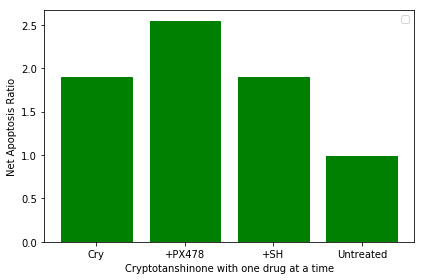

In [7]:
# Cryptotanshinone and PX478 comparison

drugs = [int('10000000',2),int('10000001',2),int('10001000',2),0] 

apoptotic_fraction = np.zeros(len(drugs))
   
for i in range(0,len(drugs)):
    
    apoptosis_ratio = boolean_network_function(inputs,drugs[i],faults)
    
    apoptotic_fraction[i] = apoptosis_ratio

#apoptotic_fraction = preprocessing.scale(apoptotic_fraction,with_mean=False,copy=False)

objects = ('Cry','+PX478','+SH','Untreated')
plt.xlabel('Cryptotanshinone with one drug at a time')
plt.ylabel('Net Apoptosis Ratio')
barlist = plt.bar(objects,apoptotic_fraction)
for i in barlist:
    i.set_color('g')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
num_in = 12
num_drugs = 8
num_faults = 7

In [9]:
# ALL FAULTS ALL DRUGS

faults = np.arange(0,(np.power(2,num_faults)))
drugs = np.arange(np.power(2,num_drugs-1),np.power(2,num_drugs))

apoptotic_fraction = np.zeros((len(faults),len(drugs)))

for j in range(0,len(faults)):
        
        for i in range(0,len(drugs)):
            
            apoptosis_ratio = boolean_network_function(inputs,drugs[i],faults[j])
            
            apoptotic_fraction[j][i] = apoptosis_ratio

#apoptotic_fraction = preprocessing.scale(apoptotic_fraction,with_mean=False,copy=False)
df = pd.DataFrame (apoptotic_fraction)
filepath = 'cry.xlsx'
df.to_excel(filepath, index=False)

In [10]:
# ALL FAULTS ALL DRUGS no Cryptotanshinone

faults = np.arange(0,(np.power(2,num_faults)))
drugs = np.arange(0,np.power(2,num_drugs-1))

apoptotic_fraction = np.zeros((len(faults),len(drugs)))

for j in range(0,len(faults)):
        
        for i in range(0,len(drugs)):
            
            apoptosis_ratio = boolean_network_function(inputs,drugs[i],faults[j])
            
            apoptotic_fraction[j][i] = apoptosis_ratio

#apoptotic_fraction = preprocessing.scale(apoptotic_fraction,with_mean=False,copy=False)
df = pd.DataFrame (apoptotic_fraction)
filepath = 'no_cry.xlsx'
df.to_excel(filepath, index=False)